Jordyn Fuchs

# Homework 2

### Problem 4a) 
Read in the red wine csv.

In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# read in csv file

redwine = pd.read_csv('winequality-red.csv')

### Problem 4b)
Split dataset into train, validation, and test sets.

In [3]:
# assign features to X variable and response variable to y

X = redwine.drop(['quality'], axis = 1)
y = redwine['quality']

In [4]:
# use scikit-learn to split data into train, validation, and test sets
# 80% train, 10% validation, 10% test

X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, 
test_size=0.2, random_state = 28)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full, 
test_size = 0.5, random_state = 28)

### Problem 4c)
Train a simple linear regression model with sum-of-squares error function error function using the closed-form solution.

In [5]:
# closed-form solution of sum-of-squares error function given by:
# w = (X^T * X)^{-1} * X^T * y

# first add in column of ones to feature matrix for intercept

X_train1 = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_val1 = np.hstack((np.ones((X_val.shape[0], 1)), X_val))
X_test1 = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# now compute w with train data

w = np.linalg.inv(X_train1.T @ X_train1) @ X_train1.T @ y_train

# for the training, validation, and testing data, find the predicted target values

y_train_pred = X_train1 @ w
y_val_pred = X_val1 @ w
y_test_pred = X_test1 @ w

# calculate error using sum of squares

sse_train = np.sum((y_train - y_train_pred)**2)
sse_val = np.sum((y_val - y_val_pred)**2)
sse_test = np.sum((y_test - y_test_pred)**2)

print("training sum-of-squares error:")
print(sse_train)

print("validation sum-of-squares error:")
print(sse_val)

print("testing sum-of-squares error:")
print(sse_test)


training sum-of-squares error:
523.9316895457189
validation sum-of-squares error:
81.70094990370174
testing sum-of-squares error:
63.0306236889231


### Problem 4d)
For the training data, create a plot of target values vs. predicted target values.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


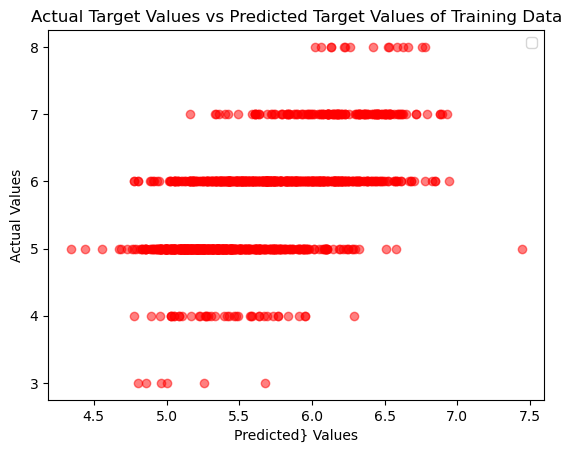

In [6]:
# create scatter plot of actual vs. predicted 

plt.scatter(y_train_pred, y_train, alpha=0.5, color="red")
plt.xlabel("Predicted} Values")
plt.ylabel("Actual Values")
plt.title("Actual Target Values vs Predicted Target Values of Training Data")
plt.legend()
plt.show()

This plot helps us visualize how accurately the model is able to predict the target values using the training data. The more accurate the model is, the more closely the predicted values will align with the true values, meaning the plot will be closer to linear. The plot above shows that the model is not extremely accurate when predicting on the training data, as each actual target value was predicted to be a wide range of values.

### Problem 4e)
Report the root-mean-square on the train and test sets.

In [7]:
# root-mean-square error given by sqrt(sse/n)

rms_train = np.sqrt(sse_train/len(y_train))
rms_test = np.sqrt(sse_test/len(y_test))

print("root-mean-square on training data: ")
print(rms_train)

print("root-mean-square on testing data: ")
print(rms_test)

root-mean-square on training data: 
0.6400325499600631
root-mean-square on testing data: 
0.6276475109930488


### Problem 4f)
Implement the least-mean-squares (LMS) algorithm for linear regression.

In [40]:
# least-mean-squares given by w = + step * error * X_train[index]

# random initialization of w(0)

np.random.seed(28)
w0 = np.random.randn(X_train1.shape[1])

# set stepsize of choice

step = 0.00001

# least-mean-squares algorithm

for i in range(500):
    for j in range(X_train1.shape[0]):
        error = y_train.iloc[j] - (X_train1[j] @ w0)
        w0 = w0 + step * error * X_train1[j]

# output final w from least-mean-squares

finalw = w0
print(finalw)

[ 0.61824305  0.141268   -0.34614783 -0.96870556 -0.00513127  1.48987076
  0.0050866  -0.0034332  -0.6707408   0.19645597  0.41317742  0.37846116]


### Problem 4g)
Report the root-mean-square on the train and test sets.

In [41]:
# root-mean-square error given by sqrt(sse/n)

y_train_pred_lms = X_train1 @ finalw
y_test_pred_lms = X_test1 @ finalw

lms_rms_train = np.sqrt((np.sum((y_train - y_train_pred_lms)**2))/len(y_train))
lms_rms_test = np.sqrt((np.sum((y_test - y_test_pred_lms)**2))/len(y_test))

print("root-mean-square on training data: ")
print(lms_rms_train)

print("root-mean-square on testing data: ")
print(lms_rms_test)

root-mean-square on training data: 
0.6866989655831828
root-mean-square on testing data: 
0.7089787645828396
